<a href="https://colab.research.google.com/github/chicot1k/karpov_course-analys-data-/blob/main/karpov_course_5lessonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/transaction_data.csv')
df.shape
df.dtypes
df.isna().sum()
df.describe()


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


<Axes: xlabel='transaction', ylabel='count'>

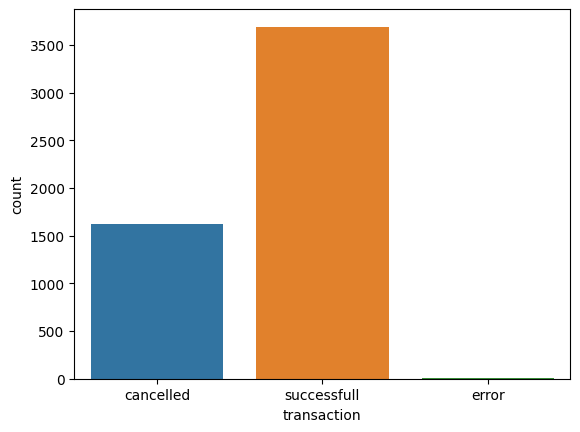

In [ ]:
df.transaction.unique()
df.transaction.value_counts()
sns.countplot(x = df.transaction)


<Axes: xlabel='transaction', ylabel='Count'>

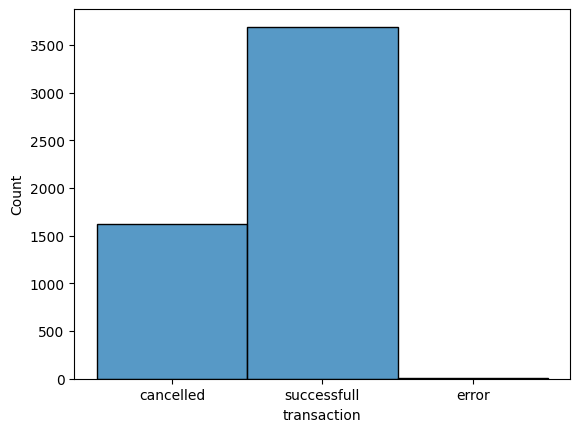

In [ ]:
sns.histplot(df.transaction)

In [ ]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [ ]:
df.query('transaction == "error"').count()

date           4
name           4
transaction    4
dtype: int64

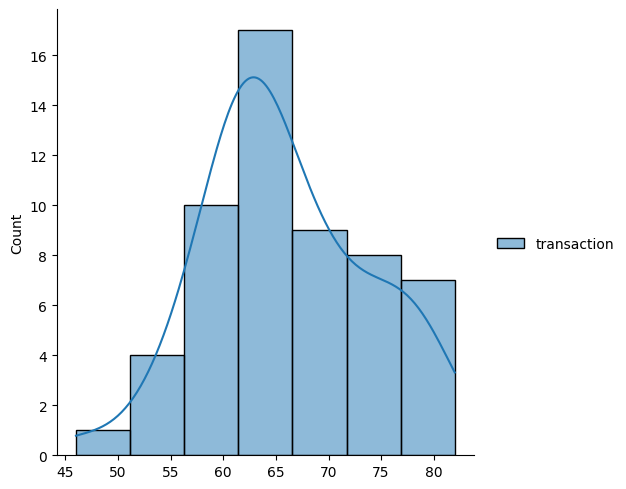

In [ ]:
dfs = df.query('transaction == "successfull"').groupby('name').agg({'transaction': 'count'})
sns.displot(dfs, kde = True)

In [8]:
df_new = pd.read_csv('/content/transaction_data_updated.csv')
df_new.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [19]:
pivo = df_new.groupby(['name', 'minute'], as_index= False )\
      .agg({'transaction':'count'})\
      .rename(columns = {'transaction':'numba'})
pivo

,name,minute,numba
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [35]:
pivot =pivo.pivot('minute','name', 'numba' )
pivot

<ipython-input-35-3861a41d5761>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot =pivo.pivot('minute','name', 'numba' )


name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0
5,3.0,NaN,2.0,3.0,1.0,NaN,5.0,3.0,1.0,3.0,...,NaN,2.0,3.0,1.0,NaN,NaN,3.0,NaN,2.0,1.0
6,4.0,1.0,2.0,2.0,NaN,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,NaN,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,NaN,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,NaN,3.0,2.0,1.0,1.0,NaN,...,NaN,1.0,NaN,1.0,2.0,4.0,2.0,1.0,1.0,1.0


<Axes: xlabel='minute'>

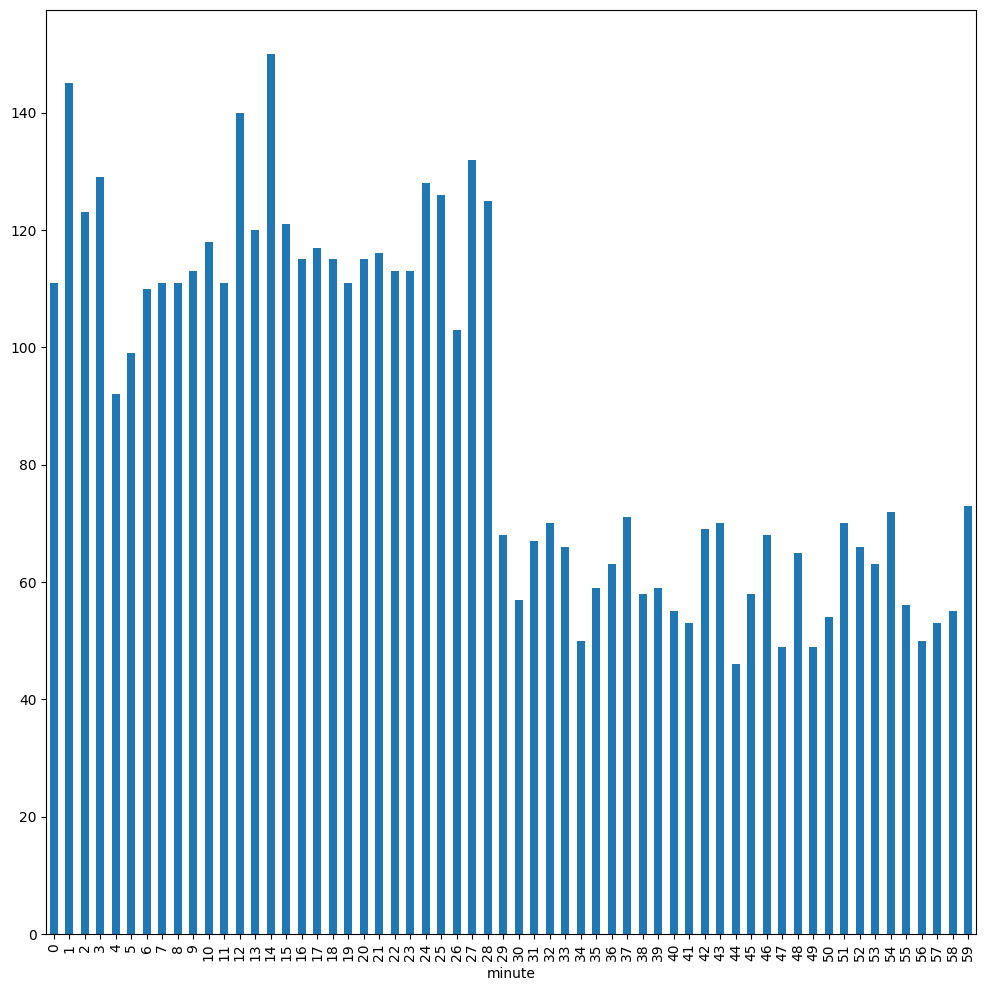

In [67]:
pivot.fillna(0,inplace = True)
pivot.sum(axis = 1).plot.bar(figsize = (12, 12))


In [33]:
df_new.pivot_table(index ='minute', columns = 'name',values =  'transaction', aggfunc = 'count')

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0
5,3.0,NaN,2.0,3.0,1.0,NaN,5.0,3.0,1.0,3.0,...,NaN,2.0,3.0,1.0,NaN,NaN,3.0,NaN,2.0,1.0
6,4.0,1.0,2.0,2.0,NaN,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,NaN,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,NaN,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,NaN,3.0,2.0,1.0,1.0,NaN,...,NaN,1.0,NaN,1.0,2.0,4.0,2.0,1.0,1.0,1.0


Идея получить значения после строки '01" и просто прибавить 60 и получу истинные минуты данных транзакий

In [74]:
df_new.date[2].split()

['2020-03-02', '01:06:14']

In [ ]:
for i in df_new.date.split():
  if i

In [75]:
df_new.date = pd.to_datetime(df_new.date)

In [79]:
df_new.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [80]:
df_new.true= df_new.date.dt.minute + df_new.date.dt.hour*60

<ipython-input-80-6c91741882ec>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_new.true= df_new.date.dt.minute + df_new.date.dt.hour*60


In [83]:
df_new.true

0       37
1       59
2       66
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    75
Name: date, Length: 5315, dtype: int64

<ipython-input-84-46bc0b9fb425>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new.true)


<Axes: xlabel='date', ylabel='Density'>

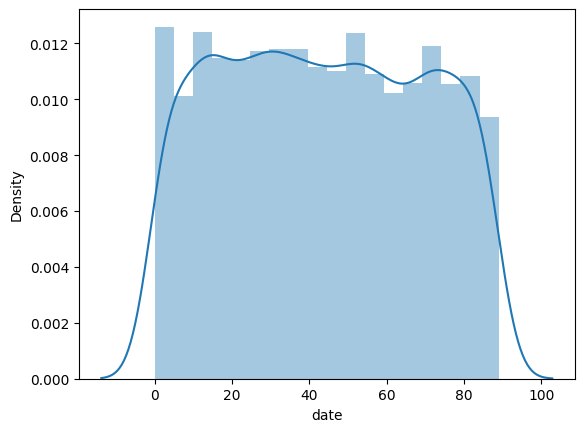

In [84]:
sns.distplot(df_new.true)

(array([537., 570., 527., 568., 544., 542., 529., 492., 535., 471.]),
 array([ 0. ,  8.9, 17.8, 26.7, 35.6, 44.5, 53.4, 62.3, 71.2, 80.1, 89. ]),
 <BarContainer object of 10 artists>)

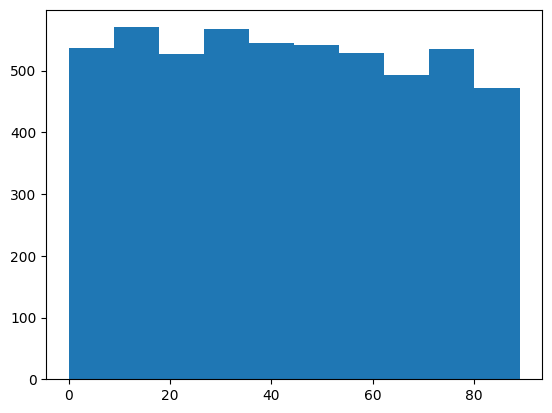

In [87]:
plt.hist(df_new.true)